In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
art_facilities_index = pd.read_csv('/content/arts_facilities_index_calculate.csv')
art_facilities_index

,구,cul_fac_num_2021,cul_fac_num_2022,mil_fac_num_2021,mil_fac_num_2022,hall_num_2021,hall_num_2022,hall_rate_2021,hall_rate_2020,hall_people_2021,hall_people_2020,art_people_2021,art_people_2020
0,강남구,115,115,493.7,486.6,34,34,51.8,35.6,164,156,70,65
1,강동구,17,17,85.0,83.8,21,21,51.8,35.6,164,156,70,65
2,강북구,17,17,117.6,117.6,6,6,51.8,35.6,164,156,70,65
3,강서구,20,20,74.5,72.9,5,6,51.8,35.6,164,156,70,65
4,관악구,17,17,62.0,59.3,3,3,51.8,35.6,164,156,70,65
5,광진구,24,24,143.8,141.2,14,16,51.8,35.6,164,156,70,65
6,구로구,22,22,122.1,119.2,20,20,51.8,35.6,164,156,70,65
7,금천구,12,12,104.4,99.6,7,7,51.8,35.6,164,156,70,65
8,노원구,20,20,92.1,91.7,6,6,51.8,35.6,164,156,70,65
9,도봉구,23,23,166.4,166.3,5,5,51.8,35.6,164,156,70,65


In [4]:
data = {
    '구': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'],
}

final_art_facilities_index = pd.DataFrame(data)
final_art_facilities_index

,구
0,강남구
1,강동구
2,강북구
3,강서구
4,관악구
5,광진구
6,구로구
7,금천구
8,노원구
9,도봉구


In [5]:
data = {
    '구': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'],
}

cal_df = pd.DataFrame(data)
cal_df

,구
0,강남구
1,강동구
2,강북구
3,강서구
4,관악구
5,광진구
6,구로구
7,금천구
8,노원구
9,도봉구


In [6]:
# 시설지수 계산
# 21, 22년도 데이터가 아닌 경우 21년도 데이터만 사용, 결과 100으로 나옴
cal_df['cul_fac_num'] = art_facilities_index['cul_fac_num_2022']/art_facilities_index['cul_fac_num_2021']
cal_df['cul_fac_num'] = cal_df['cul_fac_num']*100
cal_df['mil_fac_num'] = art_facilities_index['mil_fac_num_2022']/art_facilities_index['mil_fac_num_2021']
cal_df['mil_fac_num'] = cal_df['mil_fac_num']*100
cal_df['hall_num'] = art_facilities_index['hall_num_2022']/art_facilities_index['hall_num_2021']
cal_df['hall_num'] = cal_df['hall_num']*100
cal_df['hall_rate'] = art_facilities_index['hall_rate_2021']/art_facilities_index['hall_rate_2021']
cal_df['hall_rate'] = cal_df['hall_rate']*100
cal_df['hall_num_rate'] = (cal_df['hall_num'] + cal_df['hall_rate'])/2
cal_df

,구,cul_fac_num,mil_fac_num,hall_num,hall_rate,hall_num_rate
0,강남구,100.000000,98.561880,100.000000,100.0,100.000000
1,강동구,100.000000,98.588235,100.000000,100.0,100.000000
2,강북구,100.000000,100.000000,100.000000,100.0,100.000000
3,강서구,100.000000,97.852349,120.000000,100.0,110.000000
4,관악구,100.000000,95.645161,100.000000,100.0,100.000000
5,광진구,100.000000,98.191933,114.285714,100.0,107.142857
6,구로구,100.000000,97.624898,100.000000,100.0,100.000000
7,금천구,100.000000,95.402299,100.000000,100.0,100.000000
8,노원구,100.000000,99.565689,100.000000,100.0,100.000000
9,도봉구,100.000000,99.939904,100.000000,100.0,100.000000


In [7]:
final_art_facilities_index['cul_fac_num'] = cal_df['cul_fac_num']
final_art_facilities_index['mil_fac_num'] = cal_df['mil_fac_num']
final_art_facilities_index['hall_num'] = cal_df['hall_num']
final_art_facilities_index['hall_rate'] = cal_df['hall_rate']
final_art_facilities_index['hall_num_rate'] = cal_df['hall_num_rate']

In [8]:
# 시설인력지수 계산
# 21, 22년도 데이터가 아닌 경우 21년도 데이터만 사용, 결과 100으로 나옴
cal_df['hall_people'] = art_facilities_index['hall_people_2021']/art_facilities_index['hall_people_2021']
cal_df['hall_people'] = cal_df['hall_people']*100
cal_df['art_people'] = art_facilities_index['art_people_2021']/art_facilities_index['art_people_2021']
cal_df['art_people'] = cal_df['art_people']*100

cal_df

,구,cul_fac_num,mil_fac_num,hall_num,hall_rate,hall_num_rate,hall_people,art_people
0,강남구,100.000000,98.561880,100.000000,100.0,100.000000,100.0,100.0
1,강동구,100.000000,98.588235,100.000000,100.0,100.000000,100.0,100.0
2,강북구,100.000000,100.000000,100.000000,100.0,100.000000,100.0,100.0
3,강서구,100.000000,97.852349,120.000000,100.0,110.000000,100.0,100.0
4,관악구,100.000000,95.645161,100.000000,100.0,100.000000,100.0,100.0
5,광진구,100.000000,98.191933,114.285714,100.0,107.142857,100.0,100.0
6,구로구,100.000000,97.624898,100.000000,100.0,100.000000,100.0,100.0
7,금천구,100.000000,95.402299,100.000000,100.0,100.000000,100.0,100.0
8,노원구,100.000000,99.565689,100.000000,100.0,100.000000,100.0,100.0
9,도봉구,100.000000,99.939904,100.000000,100.0,100.000000,100.0,100.0


In [9]:
final_art_facilities_index['hall_people'] = cal_df['hall_people']
final_art_facilities_index['art_people'] = cal_df['art_people']

In [10]:
final_art_facilities_index['facilities_index'] = (cal_df['cul_fac_num'] + cal_df['mil_fac_num']+ cal_df['hall_num_rate'])/3
final_art_facilities_index['facilities_index'] = final_art_facilities_index['facilities_index'].round(2)
final_art_facilities_index

,구,cul_fac_num,mil_fac_num,hall_num,hall_rate,hall_num_rate,hall_people,art_people,facilities_index
0,강남구,100.000000,98.561880,100.000000,100.0,100.000000,100.0,100.0,99.52
1,강동구,100.000000,98.588235,100.000000,100.0,100.000000,100.0,100.0,99.53
2,강북구,100.000000,100.000000,100.000000,100.0,100.000000,100.0,100.0,100.00
3,강서구,100.000000,97.852349,120.000000,100.0,110.000000,100.0,100.0,102.62
4,관악구,100.000000,95.645161,100.000000,100.0,100.000000,100.0,100.0,98.55
5,광진구,100.000000,98.191933,114.285714,100.0,107.142857,100.0,100.0,101.78
6,구로구,100.000000,97.624898,100.000000,100.0,100.000000,100.0,100.0,99.21
7,금천구,100.000000,95.402299,100.000000,100.0,100.000000,100.0,100.0,98.47
8,노원구,100.000000,99.565689,100.000000,100.0,100.000000,100.0,100.0,99.86
9,도봉구,100.000000,99.939904,100.000000,100.0,100.000000,100.0,100.0,99.98


In [11]:
final_art_facilities_index['facilities_people_index'] = (cal_df['hall_people'] + cal_df['art_people'])/2
final_art_facilities_index

,구,cul_fac_num,mil_fac_num,hall_num,hall_rate,hall_num_rate,hall_people,art_people,facilities_index,facilities_people_index
0,강남구,100.000000,98.561880,100.000000,100.0,100.000000,100.0,100.0,99.52,100.0
1,강동구,100.000000,98.588235,100.000000,100.0,100.000000,100.0,100.0,99.53,100.0
2,강북구,100.000000,100.000000,100.000000,100.0,100.000000,100.0,100.0,100.00,100.0
3,강서구,100.000000,97.852349,120.000000,100.0,110.000000,100.0,100.0,102.62,100.0
4,관악구,100.000000,95.645161,100.000000,100.0,100.000000,100.0,100.0,98.55,100.0
5,광진구,100.000000,98.191933,114.285714,100.0,107.142857,100.0,100.0,101.78,100.0
6,구로구,100.000000,97.624898,100.000000,100.0,100.000000,100.0,100.0,99.21,100.0
7,금천구,100.000000,95.402299,100.000000,100.0,100.000000,100.0,100.0,98.47,100.0
8,노원구,100.000000,99.565689,100.000000,100.0,100.000000,100.0,100.0,99.86,100.0
9,도봉구,100.000000,99.939904,100.000000,100.0,100.000000,100.0,100.0,99.98,100.0


In [12]:
# 예술시설지수
final_art_facilities_index['arts_facilities_index'] = final_art_facilities_index['facilities_index'] + final_art_facilities_index['facilities_people_index']
final_art_facilities_index['arts_facilities_index'] = final_art_facilities_index['arts_facilities_index']/2
final_art_facilities_index['arts_facilities_index'] = final_art_facilities_index['arts_facilities_index'].round(2)
final_art_facilities_index

,구,cul_fac_num,mil_fac_num,hall_num,hall_rate,hall_num_rate,hall_people,art_people,facilities_index,facilities_people_index,arts_facilities_index
0,강남구,100.000000,98.561880,100.000000,100.0,100.000000,100.0,100.0,99.52,100.0,99.76
1,강동구,100.000000,98.588235,100.000000,100.0,100.000000,100.0,100.0,99.53,100.0,99.76
2,강북구,100.000000,100.000000,100.000000,100.0,100.000000,100.0,100.0,100.00,100.0,100.00
3,강서구,100.000000,97.852349,120.000000,100.0,110.000000,100.0,100.0,102.62,100.0,101.31
4,관악구,100.000000,95.645161,100.000000,100.0,100.000000,100.0,100.0,98.55,100.0,99.28
5,광진구,100.000000,98.191933,114.285714,100.0,107.142857,100.0,100.0,101.78,100.0,100.89
6,구로구,100.000000,97.624898,100.000000,100.0,100.000000,100.0,100.0,99.21,100.0,99.60
7,금천구,100.000000,95.402299,100.000000,100.0,100.000000,100.0,100.0,98.47,100.0,99.24
8,노원구,100.000000,99.565689,100.000000,100.0,100.000000,100.0,100.0,99.86,100.0,99.93
9,도봉구,100.000000,99.939904,100.000000,100.0,100.000000,100.0,100.0,99.98,100.0,99.99


In [13]:
final_art_facilities_index['cul_fac_num'].describe()

count     25.000000
mean     100.031579
std        0.157895
min      100.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.789474
Name: cul_fac_num, dtype: float64

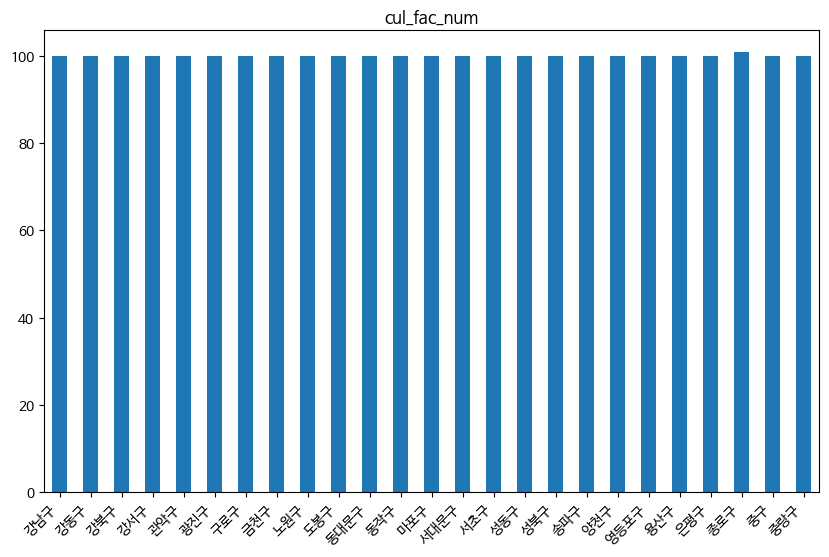

In [14]:
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 새로운 figure 생성 및 크기 설정
plt.figure(figsize=(10, 6))  # 가로크기 10, 세로크기 6

final_art_facilities_index['cul_fac_num'].plot(kind='bar')
plt.title('cul_fac_num')

# x축에 구별 이름 추가
districts = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [15]:
final_art_facilities_index['mil_fac_num'].describe()

count     25.000000
mean      98.755050
std        1.823957
min       95.402299
25%       97.800471
50%       98.390805
75%       99.886878
max      102.354904
Name: mil_fac_num, dtype: float64

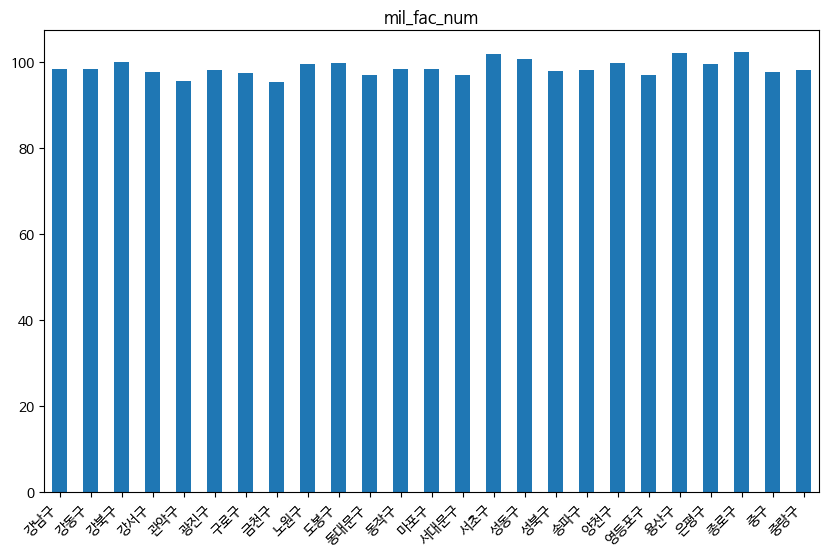

In [16]:
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 새로운 figure 생성 및 크기 설정
plt.figure(figsize=(10, 6))  # 가로크기 10, 세로크기 6

final_art_facilities_index['mil_fac_num'].plot(kind='bar')
plt.title('mil_fac_num')

# x축에 구별 이름 추가
districts = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [17]:
final_art_facilities_index['hall_num'].describe()

count     25.000000
mean     101.868756
std        4.828106
min      100.000000
25%      100.000000
50%      100.000000
75%      100.628931
max      120.000000
Name: hall_num, dtype: float64

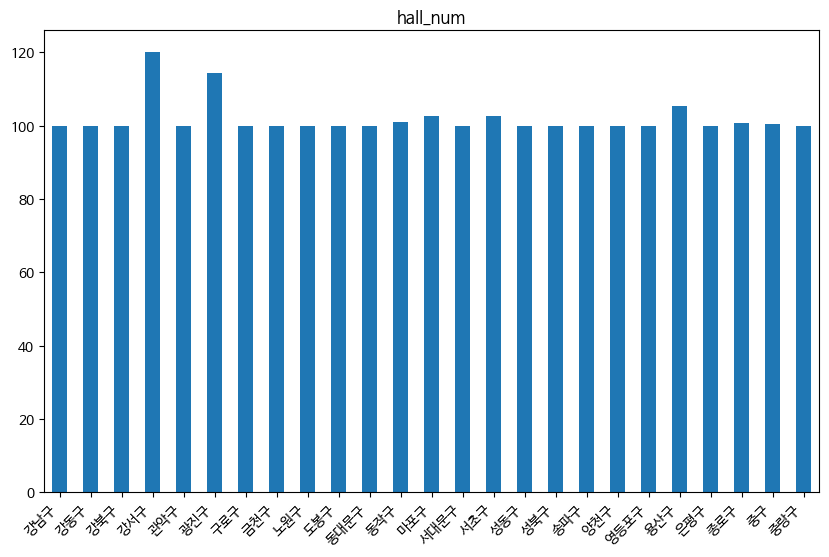

In [18]:
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 새로운 figure 생성 및 크기 설정
plt.figure(figsize=(10, 6))  # 가로크기 10, 세로크기 6

final_art_facilities_index['hall_num'].plot(kind='bar')
plt.title('hall_num')

# x축에 구별 이름 추가
districts = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [19]:
final_art_facilities_index['hall_rate'].describe()

count     25.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: hall_rate, dtype: float64

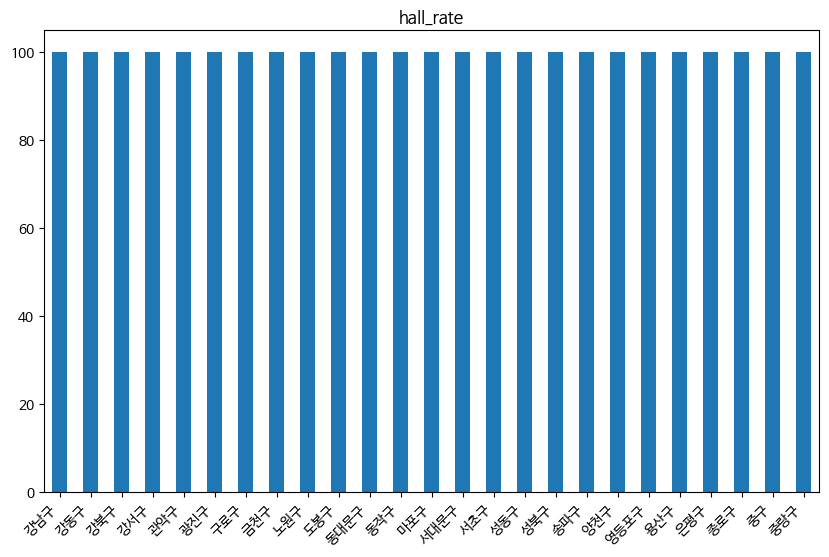

In [20]:
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 새로운 figure 생성 및 크기 설정
plt.figure(figsize=(10, 6))  # 가로크기 10, 세로크기 6

final_art_facilities_index['hall_rate'].plot(kind='bar')
plt.title('hall_rate')

# x축에 구별 이름 추가
districts = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')
plt.show()

In [21]:
final_art_facilities_index['hall_num_rate'].describe()

count     25.000000
mean     100.934378
std        2.414053
min      100.000000
25%      100.000000
50%      100.000000
75%      100.314465
max      110.000000
Name: hall_num_rate, dtype: float64

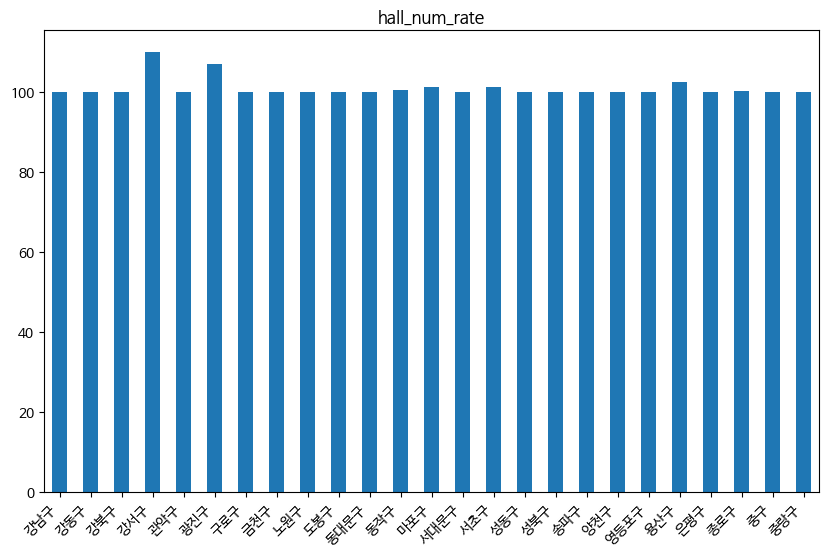

In [22]:
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 새로운 figure 생성 및 크기 설정
plt.figure(figsize=(10, 6))  # 가로크기 10, 세로크기 6

final_art_facilities_index['hall_num_rate'].plot(kind='bar')
plt.title('hall_num_rate')

# x축에 구별 이름 추가
districts = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')
plt.show()

In [23]:
final_art_facilities_index['facilities_index'].describe()

count     25.000000
mean      99.907200
std        1.024518
min       98.470000
25%       99.330000
50%       99.630000
75%      100.000000
max      102.620000
Name: facilities_index, dtype: float64

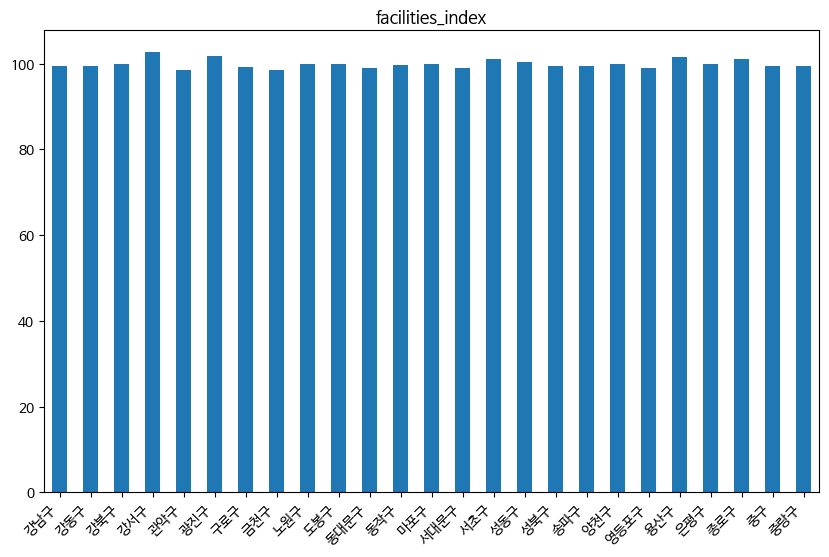

In [24]:
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 새로운 figure 생성 및 크기 설정
plt.figure(figsize=(10, 6))  # 가로크기 10, 세로크기 6

final_art_facilities_index['facilities_index'].plot(kind='bar')
plt.title('facilities_index')

# x축에 구별 이름 추가
districts = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')
plt.show()

In [25]:
final_art_facilities_index['facilities_people_index'].describe()

count     25.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: facilities_people_index, dtype: float64

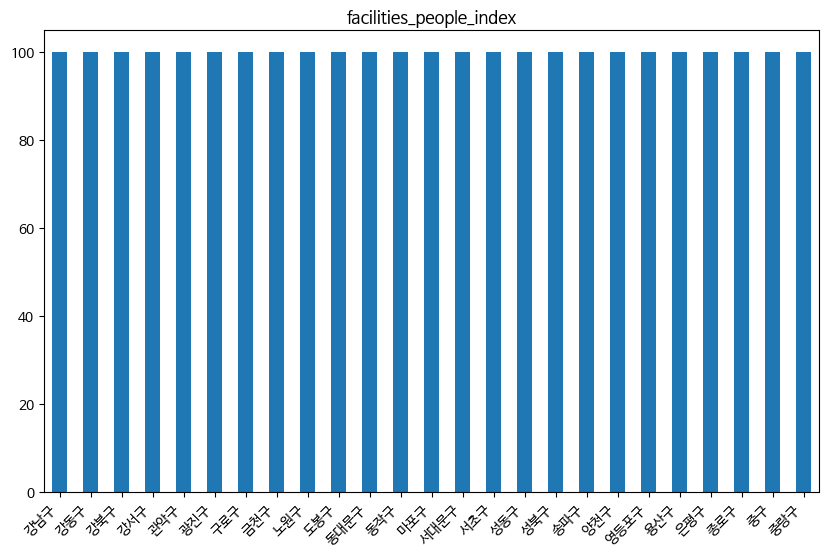

In [26]:
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 새로운 figure 생성 및 크기 설정
plt.figure(figsize=(10, 6))  # 가로크기 10, 세로크기 6

final_art_facilities_index['facilities_people_index'].plot(kind='bar')
plt.title('facilities_people_index')

# x축에 구별 이름 추가
districts = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')
plt.show()

In [27]:
final_art_facilities_index['arts_facilities_index'].describe()

count     25.000000
mean      99.954400
std        0.512039
min       99.240000
25%       99.660000
50%       99.820000
75%      100.000000
max      101.310000
Name: arts_facilities_index, dtype: float64

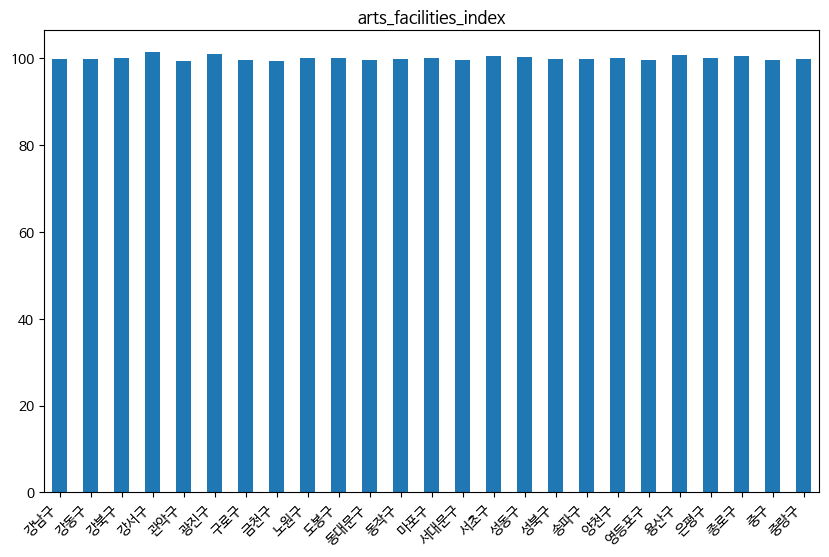

In [28]:
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 새로운 figure 생성 및 크기 설정
plt.figure(figsize=(10, 6))  # 가로크기 10, 세로크기 6

final_art_facilities_index['arts_facilities_index'].plot(kind='bar')
plt.title('arts_facilities_index')

# x축에 구별 이름 추가
districts = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')
plt.show()

In [29]:
final_art_facilities_index.to_csv('arts_facilities_index.csv', encoding='utf-8-sig', index=False)